In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import graphviz # please install this module if the environment doesn't have it yet
from IPython.display import Image

In [2]:
#2.1 is in the other notebook

#2.2
def train(feature, label):
    dt = DecisionTreeClassifier(criterion="entropy", random_state=273)
    dt.fit(feature, label)
    return dt

#2.2
def visualize_tree(model, feature_names, class_names, filename="decision_tree"):
    # Export as DOT data
    dot_data = export_graphviz(
        model,
        out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        special_characters=True
    )
    
    # Render to PDF and display
    graph = graphviz.Source(dot_data)
    graph.render(filename, format='pdf', cleanup=True)  # Saves as 'filename.pdf'
    return graph  # Optionally return the graph object for in-notebook rendering

#2.3
def predict_and_test(feature, label, tree):
    label_pred = tree.predict(feature)
    print("\nClassification Report:")
    print(classification_report(label, label_pred))
    
    visualize_confusion_matrix(label, label_pred, dt.classes_)

def visualize_confusion_matrix(label, label_pred, class_labels, title="Confusion Matrix"):
    # Generate confusion matrix
    cm = confusion_matrix(label, label_pred, labels=class_labels)

    # Display
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(cmap="Blues", values_format='d')  # 'd' = integer formatting

    plt.title(title)
    plt.grid(False)
    plt.tight_layout()
    plt.show()



decision tree (40_60)


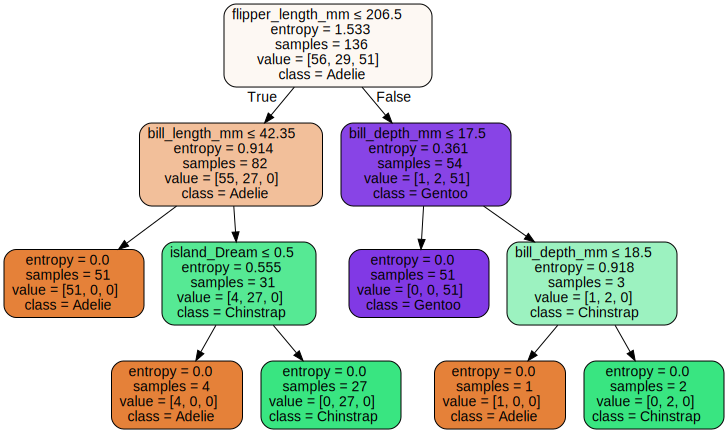


Classification Report:
              precision    recall  f1-score   support

      Adelie       0.98      0.97      0.97        95
   Chinstrap       0.93      0.97      0.95        39
      Gentoo       1.00      0.99      0.99        72

    accuracy                           0.98       206
   macro avg       0.97      0.98      0.97       206
weighted avg       0.98      0.98      0.98       206



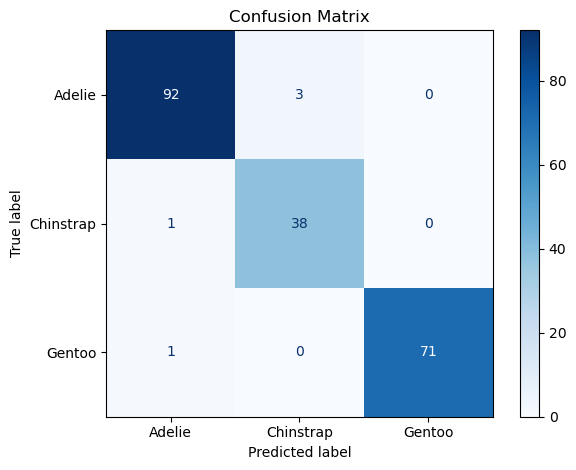


decision tree (60_40)


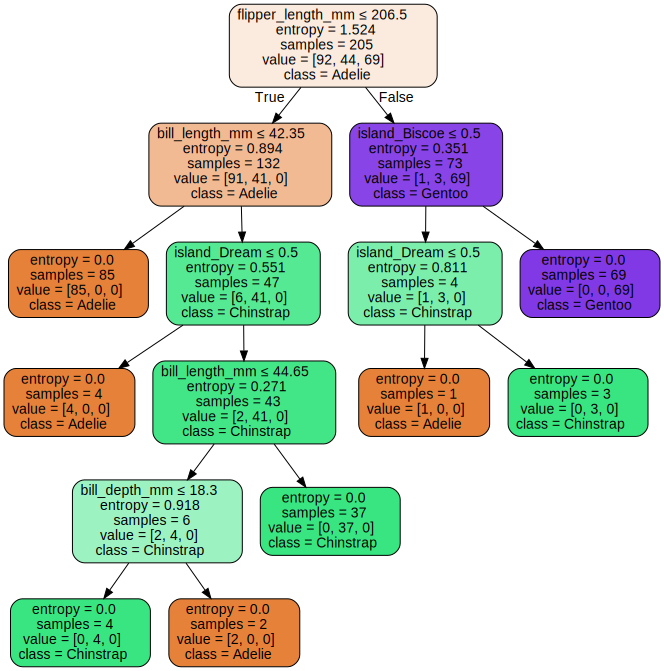


Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      0.98      0.97        59
   Chinstrap       0.96      0.96      0.96        24
      Gentoo       1.00      0.98      0.99        54

    accuracy                           0.98       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.98      0.98      0.98       137



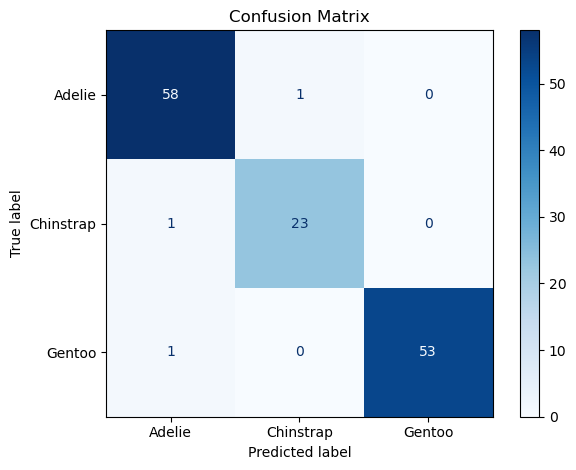


decision tree (80_20)


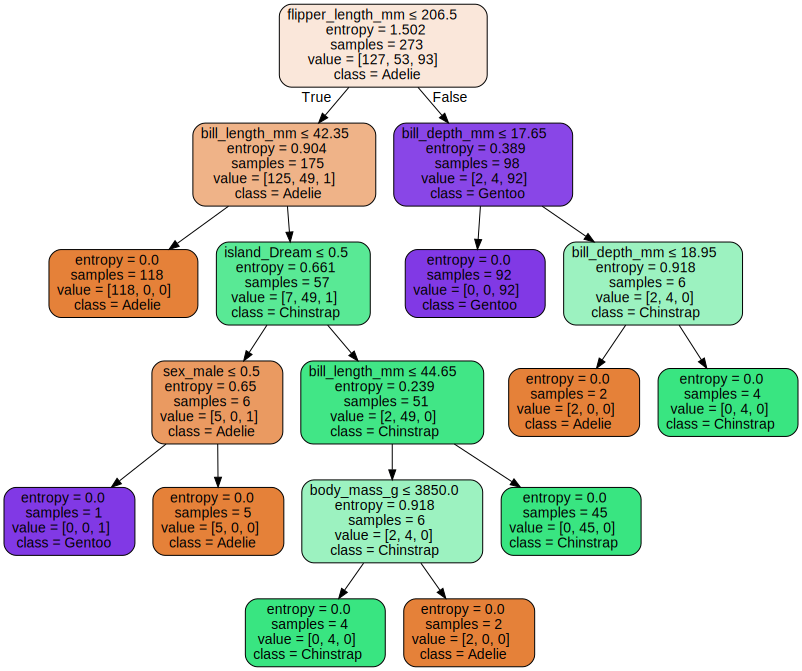


Classification Report:
              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        24
   Chinstrap       1.00      0.93      0.97        15
      Gentoo       1.00      1.00      1.00        30

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69



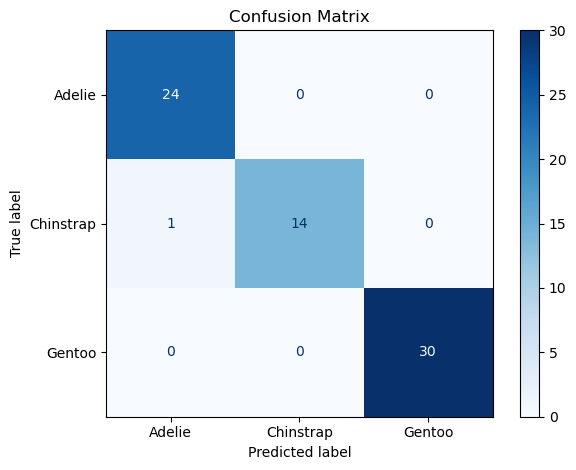


decision tree (90_10)


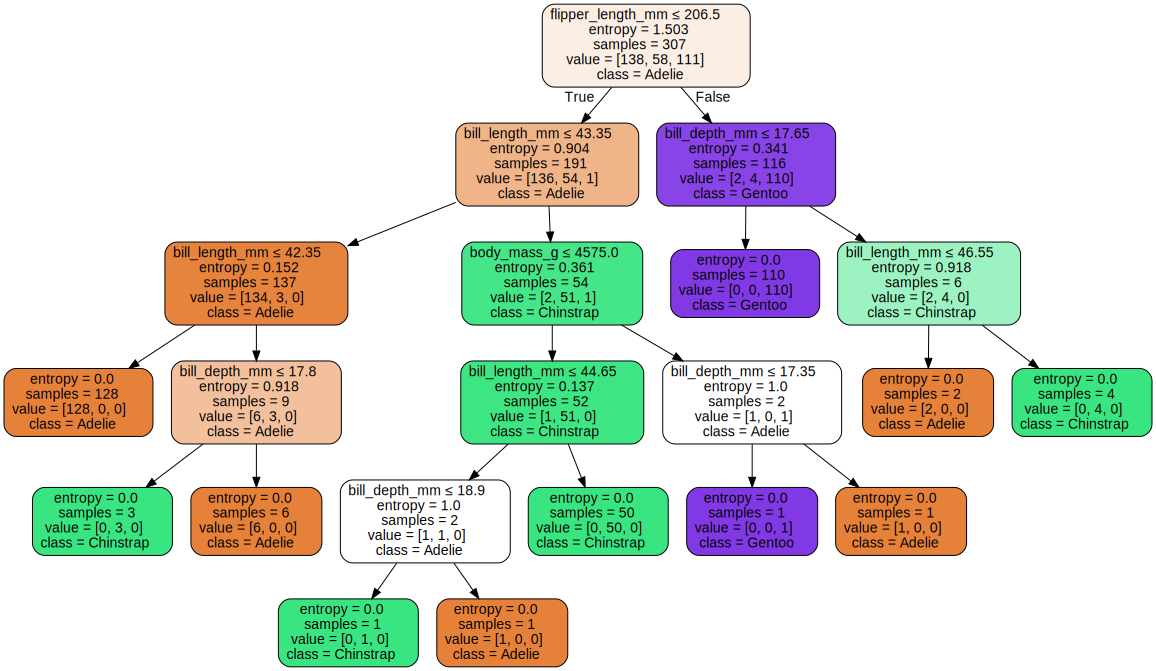


Classification Report:
              precision    recall  f1-score   support

      Adelie       0.91      0.77      0.83        13
   Chinstrap       0.75      0.90      0.82        10
      Gentoo       1.00      1.00      1.00        12

    accuracy                           0.89        35
   macro avg       0.89      0.89      0.88        35
weighted avg       0.89      0.89      0.89        35



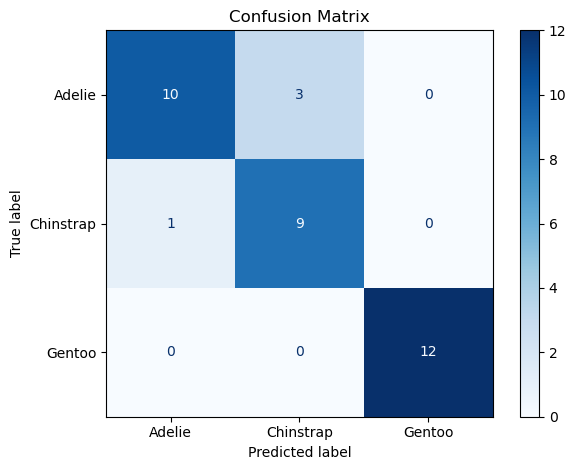

In [3]:
test_sizes = [0.6, 0.4, 0.2, 0.1]

df = pd.read_csv('cleaned_dataset/cleaned_penguins_data.csv')
island_cols = [col for col in df.columns if col.startswith("island_")]
sex_cols = [col for col in df.columns if col.startswith("sex_")]
feature_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"] + island_cols + sex_cols

for size in test_sizes:
    test_pct = int(size * 100)
    train_pct = 100 - test_pct
    postfix = f"{train_pct}_{test_pct}"

    feature_train = pd.read_csv(f'prepared_subsets/feature_train_{postfix}.csv')
    feature_test = pd.read_csv(f'prepared_subsets/feature_test_{postfix}.csv')
    label_train = pd.read_csv(f'prepared_subsets/label_train_{postfix}.csv')
    label_test = pd.read_csv(f'prepared_subsets/label_test_{postfix}.csv')

    dt = train(feature_train, label_train)
    tree = visualize_tree(dt, feature_cols, dt.classes_, f'decision_trees/decision_tree_{postfix}')
    print('')
    print(f'decision tree ({postfix})')
    display(tree)
    
    predict_and_test(feature_test, label_test, dt)


decision tree (80/20, max depth: None)


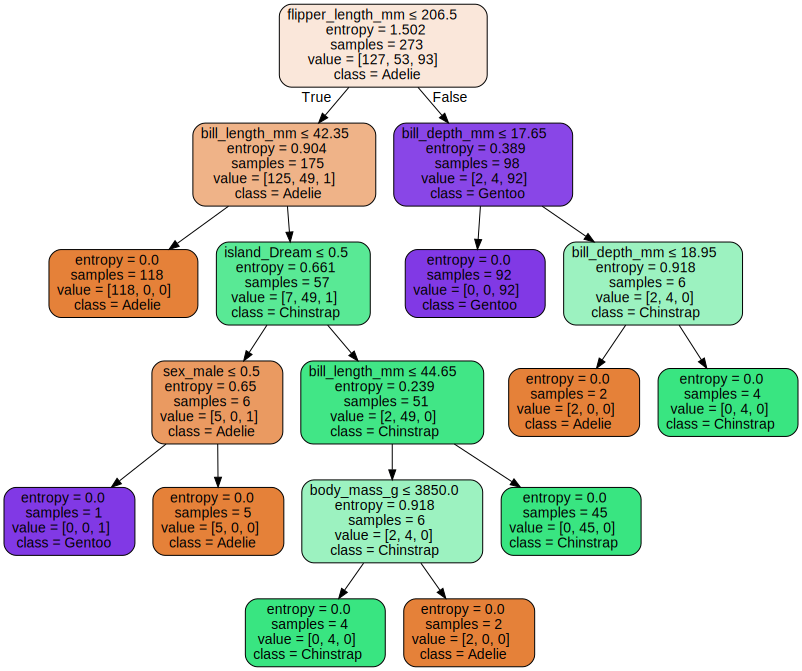


decision tree (80/20, max depth: 2)


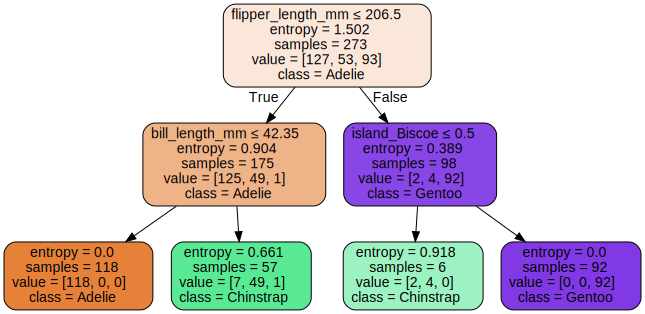


decision tree (80/20, max depth: 3)


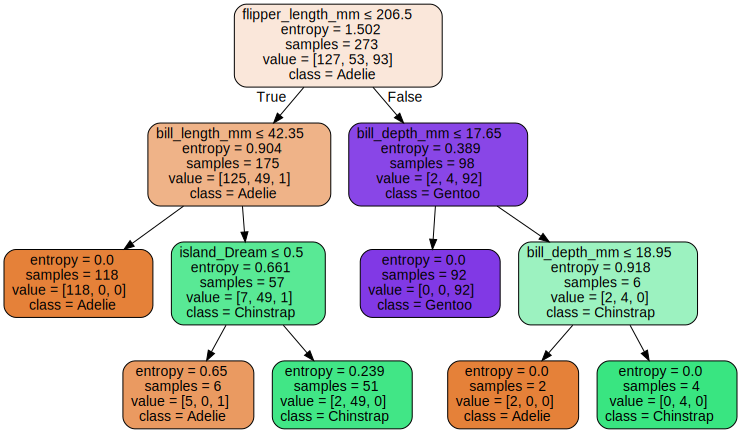


decision tree (80/20, max depth: 4)


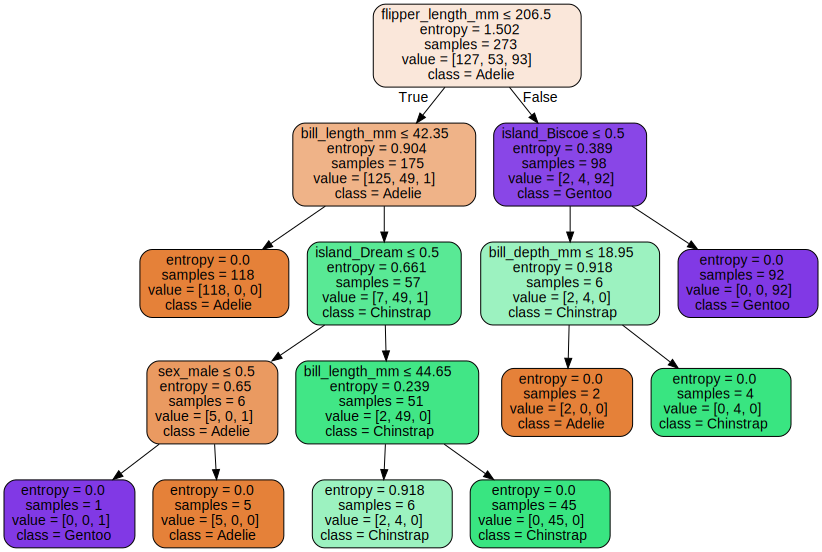


decision tree (80/20, max depth: 5)


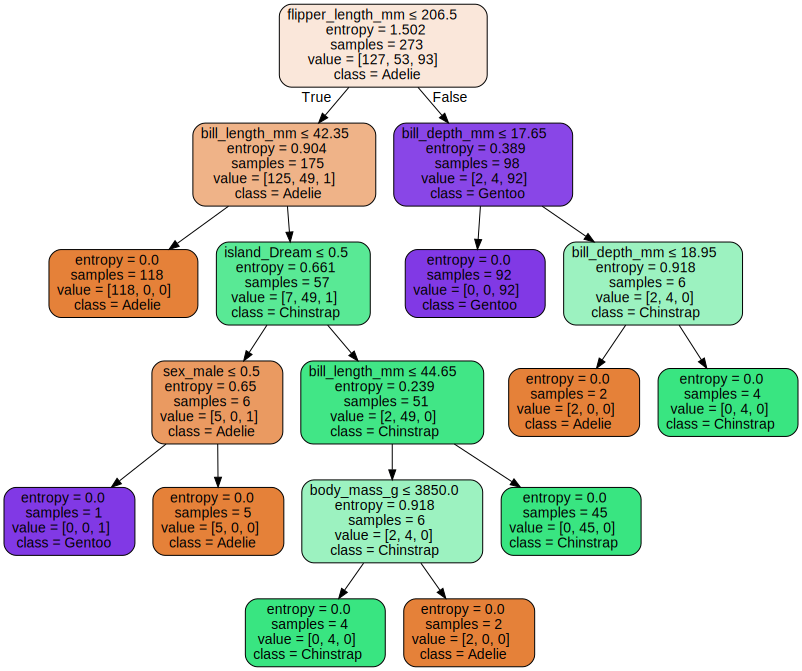


decision tree (80/20, max depth: 6)


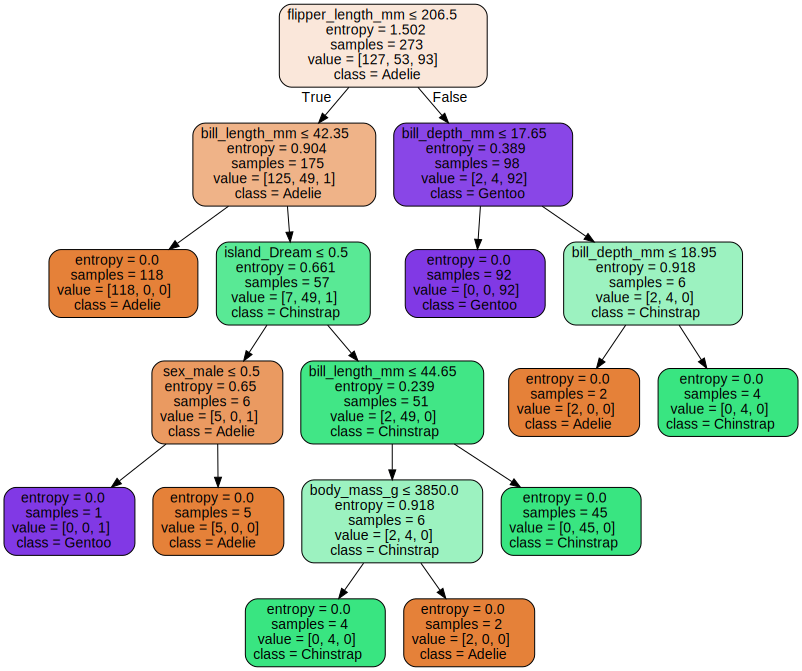


decision tree (80/20, max depth: 7)


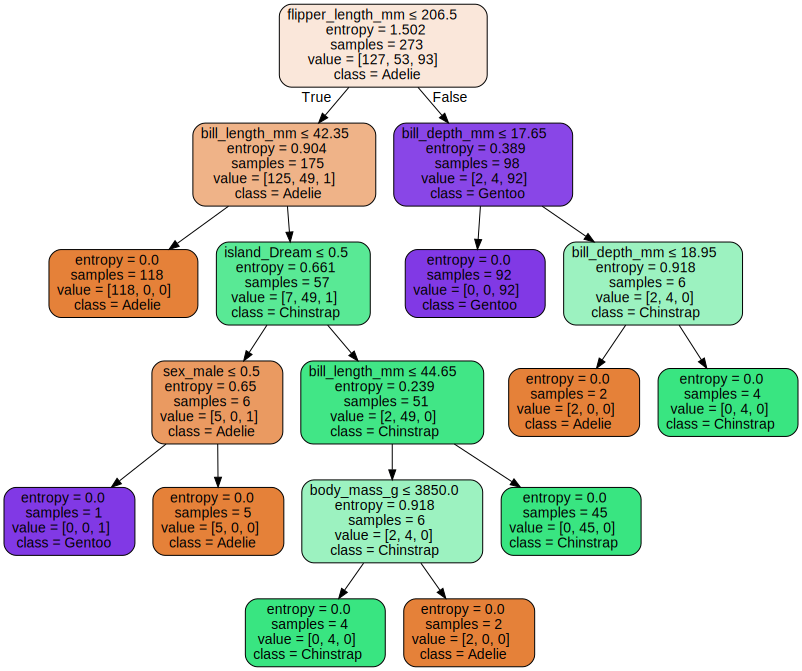


Accuracy theo max_depth:
   max_depth  Train Accuracy  Test Accuracy
0        inf        1.000000       0.985507
1        2.0        0.963370       0.927536
2        3.0        0.989011       0.985507
3        4.0        0.992674       0.985507
4        5.0        1.000000       0.985507
5        6.0        1.000000       0.985507
6        7.0        1.000000       0.985507


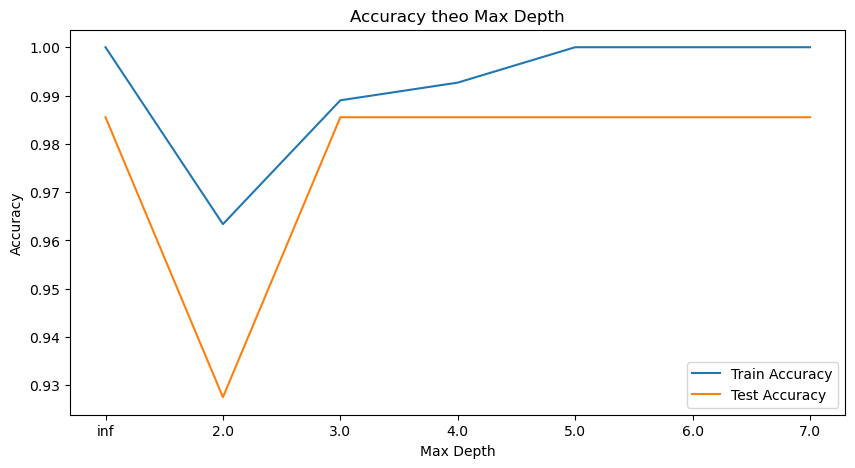

max accuracy: 0.9855072463768116
Optimal max_depth = {'max_depth': 3, 'Train Accuracy': 0.989010989010989, 'Test Accuracy': 0.9855072463768116}, Test Accuracy = 0.9855


In [12]:

#2.4
max_depths = [None, 2, 3, 4, 5, 6, 7]
results = []

feature_train = pd.read_csv(f'prepared_subsets/feature_train_80_20.csv')
feature_test = pd.read_csv(f'prepared_subsets/feature_test_80_20.csv')
label_train = pd.read_csv(f'prepared_subsets/label_train_80_20.csv')
label_test = pd.read_csv(f'prepared_subsets/label_test_80_20.csv')

for depth in max_depths:
    dt = DecisionTreeClassifier(
        criterion="entropy", 
        max_depth=depth, 
        random_state=273
    )

    dt.fit(feature_train, label_train)
    
    train_acc = dt.score(feature_train, label_train)
    test_acc = dt.score(feature_test, label_test)
    results.append({
        'max_depth': depth if depth is not None else float('inf'),
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc
    })

    # visualise the tree of each depth
    tree = visualize_tree(dt, feature_cols, dt.classes_, f'decision_trees/decision_tree_max_depth_{depth}')
    print('')
    print(f'decision tree (80/20, max depth: {depth})')
    display(tree)

# Hiển thị kết quả
results_df = pd.DataFrame(results)
print("\nAccuracy theo max_depth:")
print(results_df)

# Visualize kết quả
plt.figure(figsize=(10, 5))
plt.plot(
    results_df['max_depth'].astype(str), 
    results_df['Train Accuracy'], 
    label='Train Accuracy'
)
plt.plot(
    results_df['max_depth'].astype(str), 
    results_df['Test Accuracy'], 
    label='Test Accuracy'
)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy theo Max Depth')
plt.legend()
plt.show()



delta = 0.005 # configure if needed, 
# the goal: find the shallowest max depth that give the most accuracy difference
# delta is how much accuracy we are willing to give up for more performance,in other word how much accuracy lost is tolerated
max_test_acc = max(r["Test Accuracy"] for r in results)
print(f'max accuracy: {max_test_acc}')
candidates = [r for r in results if (max_test_acc - r["Test Accuracy"]) <= delta]

#remove none candidate


optimal_depth = min(candidates, key=lambda r: r["max_depth"])



# best_row = results_df.loc[results_df['Test Accuracy'].idxmax()]
# best_depth = None if best_row['max_depth']=='None' else int(best_row['max_depth'])
print(f"Optimal max_depth = {optimal_depth!r}, Test Accuracy = {best_row['Test Accuracy']:.4f}")

# # Train lại model với độ sâu tối ưu
# dt_opt = DecisionTreeClassifier(criterion="entropy",
#                                 max_depth=best_depth,
#                                 random_state=273)